In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 8.7 MB 6.7 MB/s eta 0:00:01     |█████████████████               | 4.6 MB 2.4 MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import sklearn
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [3]:
print(sklearn.__version__)

1.1.3


In [4]:
workdir= os.getcwd()
print(workdir)

/Users/mahrukhwaqar/datascience/ML Models


In [6]:
advertising_data= pd.read_csv("/Users/mahrukhwaqar/datascience/ML Models/Advertising.csv",index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
#to see what data looks like
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


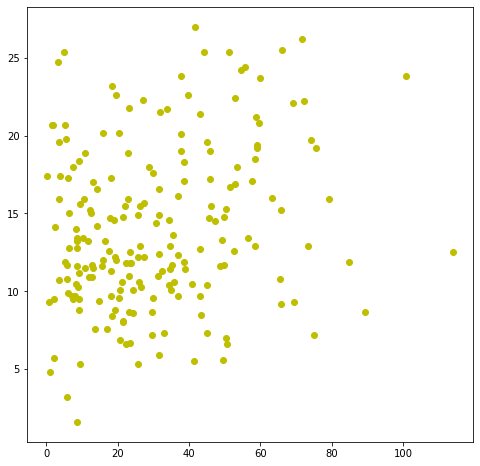

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["newspaper"], advertising_data["sales"], c="y")
plt.show()

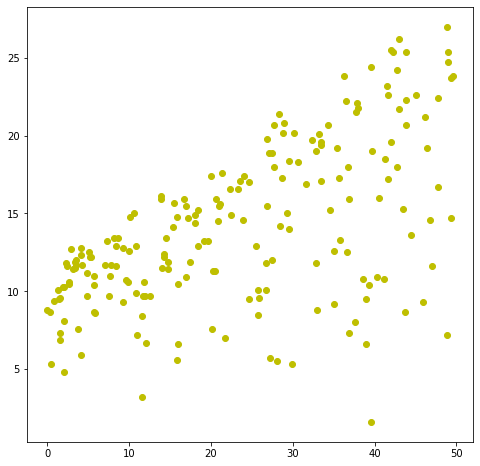

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["radio"], advertising_data["sales"], c="y")
plt.show()

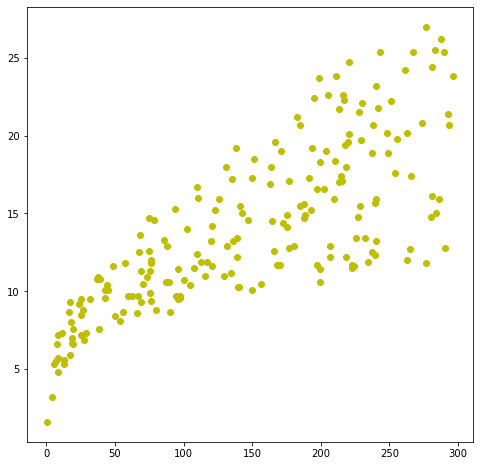

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["TV"], advertising_data["sales"], c="y")
plt.show()

In [11]:
advertising_data_correlation = advertising_data.corr()

In [12]:
advertising_data_correlation


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

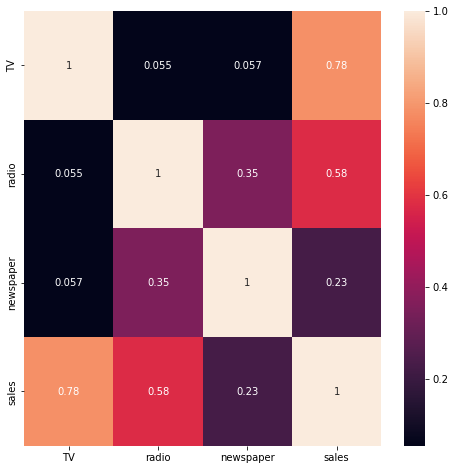

In [14]:
import seaborn as sns

fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(advertising_data_correlation, annot=True)

# Regression Analysis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#training the regression model using linear regression and train_test_split

In [20]:
#simple regression, using 1 x feature

In [21]:
X = advertising_data["TV"].values.reshape(-1,1)

#target value to predict
Y = advertising_data["sales"].values.reshape(-1,1)

#using 1-x feature to predict the target

In [22]:
X.shape, Y.shape

((200, 1), (200, 1))

In [23]:
#using train, test, split function available in Scikit learn 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [24]:
X_train.shape, Y_train.shape

((140, 1), (140, 1))

# Performing Regression Analytically by Fitting a Formula

In [27]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(X_train)

#performs (OLS) ordinary least squre regression
stats_model = sm.OLS(Y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.76e-26
Time:                        00:48:00   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

# Instantiating the ML Model

In [31]:
#specifiying normalize=true as an input argument, it will center our x data around 0 as mean.
#subtract mean from all of out x-predictor value.

#fit fuction will train the linear regression model
linear_reg = LinearRegression().fit(X_train, Y_train)
linear_reg

LinearRegression()

In [32]:
#R square score, it is same to the one we got analytically
print("Training Score: " , linear_reg.score(X_train, Y_train))

Training Score:  0.5552336104251212


In [34]:
#computing R square on test data, the data model havn't seen before
Y_pred = linear_reg.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
print("Testing Score: " , r2_score(Y_test, Y_pred))

Testing Score:  0.725606346597073


In [37]:
#there is no function to calcute adjusted R square but we can compute it by ourselves using the following formula.

In [41]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1-r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1])
    return adj_r_square

In [42]:
print("Adjusted_r2_score: ", adjusted_r2(r2_score(Y_test, Y_pred), Y_test, X_test))

Adjusted_r2_score:  0.725606346597073


View the Regression Line on the Underlined Data

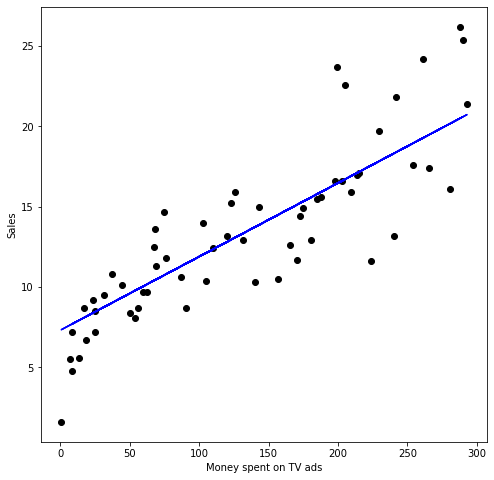

In [44]:
plt.figure(figsize=(8,8))

plt.scatter(X_test, Y_test, c='black')

plt.plot(X_test, Y_pred, c='blue')

plt.xlabel("Money spent on TV ads")
plt.ylabel("Sales")

plt.show()

# Multiple Regression

In [46]:
x= advertising_data.drop("sales", axis=1)
y= advertising_data["sales"]


In [47]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [48]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [51]:
x_train.shape, y_train.shape

((140, 3), (140,))

In [52]:
x_train_with_intercept = sm.add_constant(x_train)

#performs (OLS) ordinary least squre regression
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           8.76e-70
Time:                        14:09:19   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.0

In [54]:
linear_reg = LinearRegression().fit(x_train, y_train)
linear_reg

LinearRegression()

In [55]:
print("Training Score: " , linear_reg.score(x_train, y_train))

Training Score:  0.9065727532450596


In [58]:
y_pred = linear_reg.predict(x_test)

In [59]:
print("Testing Score: " , r2_score(y_test, y_pred))

Testing Score:  0.8649018906637792


In [60]:
print("Adjusted_r2_score: ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score:  0.8601616061256662
